# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

In [ ]:
# Install SpaCy if not already installed
!pip install spacy

In [ ]:
# Download the small English model for SpaCy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [2]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.
import pandas as pd
import zipfile
import io

In [3]:
# Path to your zip file
# Assuming the uploaded file name is 'archive.zip'
zip_file_path = 'archive.zip'

# List to store individual DataFrames
dataframes = []

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Loop through each file in the zip file
    for file_name in zip_ref.namelist():
        if file_name.endswith(".csv"):  # Check if the file is a CSV
            # Read the CSV file into a DataFrame directly from the zip
            with zip_ref.open(file_name) as file:
                temp_df = pd.read_csv(file)
                # Add the DataFrame to the list
                dataframes.append(temp_df)

# Concatenate all DataFrames into one DataFrame named `df`
df = pd.concat(dataframes, ignore_index=True)

In [4]:
df.head()

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN


In [5]:
df.tail()

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
6022,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008-06-28,drew looks at me i fake a smile so he won't se...,2008.0,474.0
6023,Taylor Swift,Evermore [Forward],NaN,2020-12-11,to put it plainly we just couldnt stop writing...,2020.0,475.0
6024,Taylor Swift,Welcome Back Grunwald,NaN,NaN,turn wycd on you're on your grunwald back from...,NaN,476.0
6025,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,477.0
6026,Taylor Swift,Find you,NaN,NaN,trying just like they say just taking the step...,NaN,478.0


In [6]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [7]:
# View the initial length of the DataFrame
initial_length = len(df)
print(f"Initial length of the DataFrame: {initial_length}")

# To see the count of each unique string in the 'Lyric' column
value_counts = df['Lyric'].value_counts()

print("Value counts for 'Lyric' column:")
print(df['Lyric'].value_counts().head(10))  # Print top 10 frequent lyrics for understanding


Initial length of the DataFrame: 6027
Value counts for 'Lyric' column:
Lyric
lyrics for this song have yet to be released please check back once the song has been released                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [8]:
# Define a list of unnecessary or placeholder lyrics
placeholder_lyrics = [
    'lyrics for this song have yet to be released please check back once the song has been released',
    'unreleased',
    'tba',
    'lyrics for this song will be available upon release'
]

# Remove rows with placeholder lyrics or missing values
df = df[~df['Lyric'].isin(placeholder_lyrics)]  # Remove rows with placeholder lyrics
df = df.dropna(subset=['Lyric'])  # Drop rows where 'Lyric' is NaN

# Remove rows with duplicated lyrics (keeping the first occurrence)
df = df.drop_duplicates(subset='Lyric', keep='first')

# View the length of the cleaned DataFrame after removing duplicates
cleaned_length = len(df)
print(f"Length of the cleaned DataFrame after removing duplicates: {cleaned_length}")

# Optional: View the first few rows of the cleaned DataFrame
print(df.head())
#print(df.tail())

Length of the cleaned DataFrame after removing duplicates: 5636
          Artist                   Title            Album        Date  \
0  Ariana Grande          ​thank u, next    thank u, next  2018-11-03   
1  Ariana Grande                 7 rings    thank u, next  2019-01-18   
2  Ariana Grande         ​God is a woman        Sweetener  2018-07-13   
3  Ariana Grande            Side To Side  Dangerous Woman  2016-05-20   
4  Ariana Grande  ​​no tears left to cry        Sweetener  2018-04-20   

                                               Lyric    Year  Unnamed: 0  
0  thought i'd end up with sean but he wasn't a m...  2018.0         NaN  
1  yeah breakfast at tiffany's and bottles of bub...  2019.0         NaN  
2  you you love it how i move you you love it how...  2018.0         NaN  
3  ariana grande  nicki minaj i've been here all ...  2016.0         NaN  
4  right now i'm in a state of mind i wanna be in...  2018.0         NaN  


### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

In [9]:
import matplotlib.pyplot as plt

<ipython-input-10-950a7c021d32>:11: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-10-950a7c021d32>:11: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  plt.tight_layout()
<ipython-input-10-950a7c021d32>:11: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
<ipython-input-10-950a7c021d32>:11: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-10-950a7c021d32>:11: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing

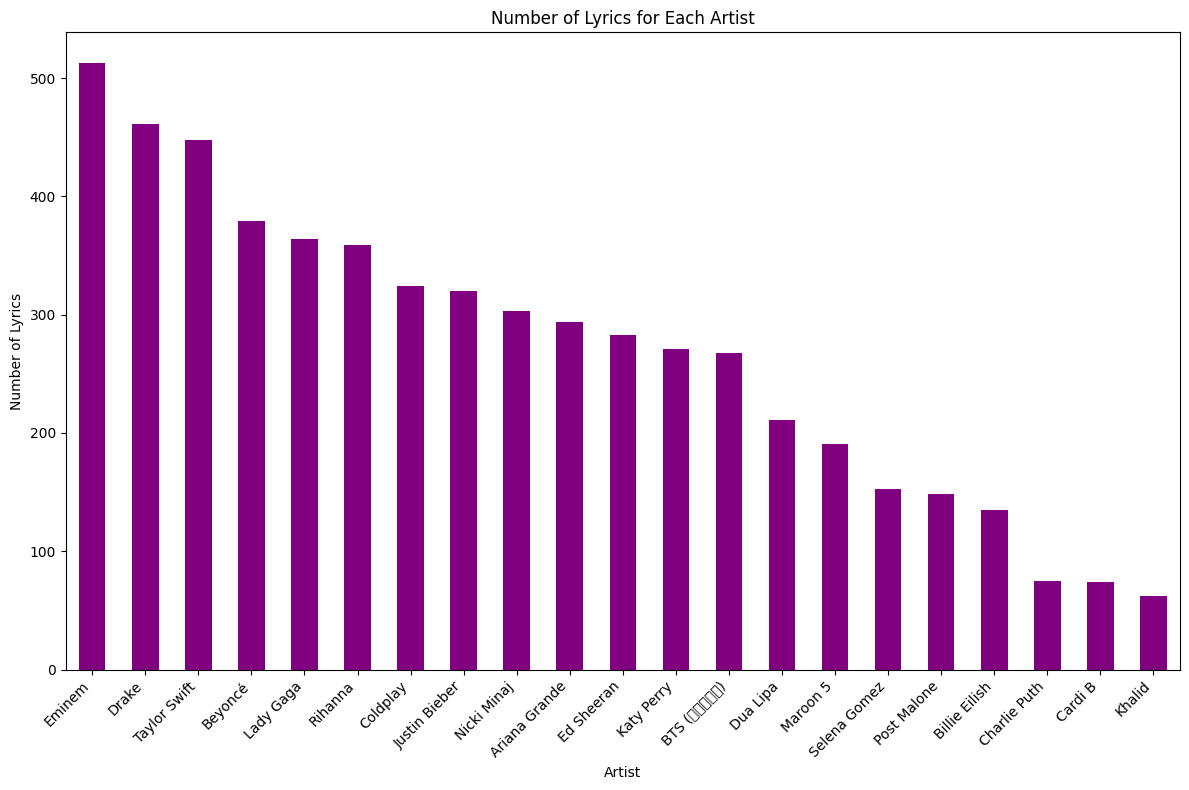

In [10]:
# Group the DataFrame by the 'Artist' column and count the number of lyrics
artist_counts = df['Artist'].value_counts()

# Create a histogram for the number of lyrics of each artist
plt.figure(figsize=(12, 8))
artist_counts.plot(kind='bar', color='purple')
plt.xlabel('Artist')
plt.ylabel('Number of Lyrics')
plt.title('Number of Lyrics for Each Artist')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [11]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
# Define the preprocessing function
def preprocess_data(df):
    df['Lyric'] = df['Lyric'].astype(str)

    # Lowercasing
    df['Lyric'] = df['Lyric'].str.lower()

    # Remove punctuation
    df['Lyric'] = df['Lyric'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Remove special characters
    df['Lyric'] = df['Lyric'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Tokenization and Lemmatization using SpaCy
    processed_lyrics = []
    for lyric in df['Lyric']:
        doc = nlp(lyric)  # Use SpaCy to process the text
        lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

        # Extract named entities - I COULDN'T HANDLE USING THIS, SO I DECIDED TO COMMENT THIS OUT
        #entities = [ent.text for ent in doc.ents]  # Extract the named entities

        processed_lyrics.append(' '.join(lemmatized_tokens))

    df['Lyric'] = processed_lyrics
    #df['Extracted_Entities'] = extracted_entities

    return df

# Apply the preprocessing function to the DataFrame
df = preprocess_data(df)

# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Limit to 5000 features for efficiency
X = vectorizer.fit_transform(df['Lyric'])

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Artist'])

In [14]:
import pandas as pd
from collections import Counter

# Count frequency of words and print the top 15
all_words = ' '.join(df['Lyric']).split()  # Combine all lyrics into one string, then split into words
if not all_words:
    print("No words found after splitting.")
else:
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(15)

    # Print the most common words and their frequencies for analysis
    print("Top 15 most common words:")
    for word, freq in most_common_words:
        print(word, freq)

    # If most_common_words is empty, print a helpful message
    if len(most_common_words) == 0:
        print("No frequent words found. Something might still be wrong with the lyrics preprocessing.")


Top 15 most common words:
not 35627
I 28817
m 27955
get 23581
do 19822
like 17975
know 16179
go 15259
love 15163
yeah 13315
oh 12781
you 12225
s 10417
say 9535
baby 9096


In [15]:
# List of top 15 most common words to remove
words_to_remove = ['not', 'I', 'm', 'get', 'do', 'like', 'know', 'go', 'love', 'yeah', 'oh', 'you', 's', 'say', 'baby']

# Convert words to lowercase for consistency in removal (since lyrics are all lowercased)
#words_to_remove = [word.lower() for word in words_to_remove]

# Define a function to remove top frequent words from lyrics
def remove_top_words(df, words_to_remove):
    df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
    return df

# Apply the function to remove the words from the dataset
df = remove_top_words(df, words_to_remove)

# Optional: Verify that the words were removed
print(df['Lyric'].head())

0    think d end sean be match write song ricky lis...
1    breakfast tiffanys bottle bubble girl tattoo t...
2    move touch one ll believe god woman feel midni...
3    ariana grande nicki minaj ve night ariana ve d...
4    right state mind wanna time be tear left cry p...
Name: Lyric, dtype: object


In [16]:
print("Head of the dataset\n",df.head())
print("\nTail of the dataset\n",df.tail())

Head of the dataset
           Artist                   Title            Album        Date  \
0  Ariana Grande          ​thank u, next    thank u, next  2018-11-03   
1  Ariana Grande                 7 rings    thank u, next  2019-01-18   
2  Ariana Grande         ​God is a woman        Sweetener  2018-07-13   
3  Ariana Grande            Side To Side  Dangerous Woman  2016-05-20   
4  Ariana Grande  ​​no tears left to cry        Sweetener  2018-04-20   

                                               Lyric    Year  Unnamed: 0  
0  think d end sean be match write song ricky lis...  2018.0         NaN  
1  breakfast tiffanys bottle bubble girl tattoo t...  2019.0         NaN  
2  move touch one ll believe god woman feel midni...  2018.0         NaN  
3  ariana grande nicki minaj ve night ariana ve d...  2016.0         NaN  
4  right state mind wanna time be tear left cry p...  2018.0         NaN  

Tail of the dataset
             Artist                                              Titl

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5636 entries, 0 to 6026
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      5636 non-null   object 
 1   Title       5636 non-null   object 
 2   Album       4204 non-null   object 
 3   Date        4178 non-null   object 
 4   Lyric       5636 non-null   object 
 5   Year        4178 non-null   float64
 6   Unnamed: 0  5342 non-null   float64
dtypes: float64(2), object(5)
memory usage: 352.2+ KB


In [18]:
import pandas as pd
from collections import Counter
import re

# Count frequency of words
all_words = ' '.join(df['Lyric']).split()  # Combine all lyrics into one string, then split into words
word_freq = Counter(all_words)

# Define a threshold for rare words
rare_threshold = 5

# Identify rare words (words that appear fewer times than the threshold)
rare_words = [word for word, count in word_freq.items() if count < rare_threshold]
print(f"Number of rare words identified: {len(rare_words)}")

# Remove the rare words from the dataset
def remove_rare_words(df, words_to_remove):
    df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
    return df

# Apply the function to remove rare words from the dataset
df = remove_rare_words(df, rare_words)

# Optional: Verify that the words were removed
print(df['Lyric'].head())


Number of rare words identified: 25324
0    think d end sean be match write song ricky lis...
1    breakfast tiffanys bottle bubble girl tattoo t...
2    move touch one ll believe god woman feel midni...
3    ariana grande nicki minaj ve night ariana ve d...
4    right state mind wanna time be tear left cry p...
Name: Lyric, dtype: object


#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Separate features (lyrics) and labels (artists)
X = df['Lyric']
y = df['Artist']

# Set a consistent random state for reproducibility
random_state = 42

# Step 1: Split the data into 70% training and 30% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=random_state, shuffle=True)

# Step 2: Split the remaining 30% into 15% dev and 15% test
X_dev, X_test, y_dev, y_test = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=random_state, shuffle=True)

# Print the sizes of each set
print(f"Training set size: {len(X_train)}")
print(f"Development set size: {len(X_dev)}")
print(f"Test set size: {len(X_test)}")

Training set size: 3945
Development set size: 845
Test set size: 846


In [21]:
# Apply TF-IDF vectorization before using SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE to the training set only
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Convert the resampled training set to a dense format
X_train_resampled = X_train_resampled.toarray()
X_dev_tfidf = X_dev_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Print the new size of the training set after resampling
print(f"Resampled Training set size: {len(X_train_resampled)}")

Resampled Training set size: 7707


### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [22]:
import numpy as np
import pandas as pd
from collections import defaultdict

In [23]:
# Implement Bag-of-Words from scratch
class BagOfWords:
    def __init__(self):
        self.vocab = {}
        self.idf = {}

    def fit(self, documents):
        vocab_index = 0
        for doc in documents:
            words = doc.split()
            for word in words:
                if word not in self.vocab:
                    self.vocab[word] = vocab_index
                    vocab_index += 1

    def transform(self, documents):
        num_docs = len(documents)
        bow_matrix = np.zeros((num_docs, len(self.vocab)))

        for i, doc in enumerate(documents):
            words = doc.split()
            for word in words:
                if word in self.vocab:
                    word_index = self.vocab[word]
                    bow_matrix[i][word_index] += 1
        return bow_matrix

In [24]:
# Implement Naive Bayes Classifier from Scratch
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = defaultdict(float)
        self.word_probs = defaultdict(lambda: defaultdict(float))
        self.vocab_size = 0
        self.classes = []

    def train(self, X, y):
        # Calculate priors
        self.classes = np.unique(y)
        total_documents = len(y)

        class_word_counts = defaultdict(int)
        word_counts_per_class = {cls: np.zeros(X.shape[1]) for cls in self.classes}

        for i, cls in enumerate(y):
            self.class_priors[cls] += 1
            word_counts_per_class[cls] += X[i]
            class_word_counts[cls] += np.sum(X[i])

        self.vocab_size = X.shape[1]

        # Calculate class priors and word probabilities
        for cls in self.classes:
            self.class_priors[cls] /= total_documents
            for word_index in range(self.vocab_size):
                # Use Laplace smoothing
                self.word_probs[cls][word_index] = (word_counts_per_class[cls][word_index] + 1) / (class_word_counts[cls] + self.vocab_size)

    def predict(self, X):
        predictions = []

        for x in X:
            scores = {}
            for cls in self.classes:
                class_score = np.log(self.class_priors[cls])  # Start with log prior
                for word_index in range(self.vocab_size):
                    if x[word_index] > 0:
                        class_score += x[word_index] * np.log(self.word_probs[cls][word_index])
                scores[cls] = class_score

            # Choose the class with the highest score
            predictions.append(max(scores, key=scores.get))

        return predictions

### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

I have done these in preprocessing cell, so I will not run them again.I did not use char n-gram as it may lead to overfit in this case. The results are moderate, and we do not really need char n-grams.

So, used feature engineering methods are
- TFIDF Vectorizer for Lyrics
- Label Encoder for Artist (categorical value)
- Unigram and bigram for lyrics

Rest of the feature engineering steps are done in the following respective code cells for each applied algorithm.

In [25]:
####
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Limit to 5000 features for efficiency
X = vectorizer.fit_transform(df['Lyric'])

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Artist'])

### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

Naive Bayes

In [26]:
# Create the Bag-of-Words representation for the lyrics
bow = BagOfWords()
bow.fit(X_train)

# Transform the training, dev, and test sets
X_train_bow = bow.transform(X_train)
X_dev_bow = bow.transform(X_dev)
X_test_bow = bow.transform(X_test)

In [27]:
# Train the Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train_bow, y_train)

# Predict on the development set
predictions_dev = nb_classifier.predict(X_dev_bow)

In [28]:
# Calculate accuracy
accuracy = np.sum(predictions_dev == y_dev) / len(y_dev)
print(f"Validation accuracy for Naive Bayes: {accuracy * 100:.2f}%")

Validation accuracy for Naive Bayes: 64.50%


In [29]:
from sklearn.metrics import f1_score

In [30]:
# Calculate F1 score
f1 = f1_score(y_dev, predictions_dev, average='weighted')
print(f"Validation F1 score for Naive Bayes: {f1:.2f}")

Validation F1 score for Naive Bayes: 0.65


Neural Network with MLP

In [31]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create the Bag-of-Words representation for the lyrics - already done above
# Transform the training, dev, and test sets - already done above


# Train the Neural Network classifier
# MLPClassifier is chosen because it is a multi-layer perceptron, a type of feedforward neural network
# that is well-suited for classification tasks involving complex relationships and patterns in the data.
# It can learn non-linear mappings which are often useful for text-based features.
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_classifier.fit(X_train_bow, y_train)

# Predict on the development set
predictions_dev = nn_classifier.predict(X_dev_bow)

# Calculate accuracy
accuracy = accuracy_score(y_dev, predictions_dev)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score
f1 = f1_score(y_dev, predictions_dev, average='weighted')
print(f"Validation F1 score: {f1:.2f}")

Validation accuracy: 62.37%
Validation F1 score: 0.62


Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [36]:
# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_bow, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_result.best_params_}')

# Train the best SVM model
best_svm_model = grid_result.best_estimator_
best_svm_model.fit(X_train_bow, y_train)

# Predict on the development set
predictions_dev = best_svm_model.predict(X_dev_bow)

# Calculate accuracy for SVM
accuracy = accuracy_score(y_dev, predictions_dev)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score for SVM
f1 = f1_score(y_dev, predictions_dev, average='weighted')
print(f"Validation F1 score: {f1:.2f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Validation accuracy: 60.36%
Validation F1 score: 0.60


Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=500, random_state=42)
lr_classifier.fit(X_train_bow, y_train)

# Make predictions on the dev set using Logistic Regression
lr_predictions_dev = lr_classifier.predict(X_dev_bow)

# Calculate accuracy for Logistic Regression on dev set
lr_accuracy_dev = accuracy_score(y_dev, lr_predictions_dev)
lr_f1_dev = f1_score(y_dev, lr_predictions_dev, average='weighted')

# Print the results
print(f"Logistic Regression - Dev Accuracy: {lr_accuracy_dev * 100:.2f}%")
print(f"Logistic Regression - Dev F1 Score: {lr_f1_dev:.2f}")

Logistic Regression - Dev Accuracy: 63.79%
Logistic Regression - Dev F1 Score: 0.63


Neural Networks in a More Proper Way
(Unfortunately I couldn't make it work :( )

In [ ]:
pip install scikeras

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
import numpy as np

In [ ]:
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_dev = label_encoder.transform(y_dev)

# Neural Network Hyperparameter Tuning and Training
# Define the function to create the Neural Network model
def create_model(optimizer='adam', dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_bow.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier for hyperparameter tuning
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20]
}

# Perform RandomizedSearchCV to find the best hyperparameters
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, verbose=1, n_jobs=-1, n_iter=10)
grid_result = grid.fit(X_train_bow, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_result.best_params_}')

# Get the best hyperparameters
best_params = grid_result.best_params_

# Create the best model using the best hyperparameters
best_model = create_model(optimizer=best_params['model__optimizer'],
                           dropout_rate=best_params['model__dropout_rate'])

# Train the best model with EarlyStopping and ReduceLROnPlateau callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# Fit the model
history = best_model.fit(X_train_bow, y_train, validation_data=(X_dev_bow, y_dev),
                         epochs=best_params['epochs'],
                         batch_size=best_params['batch_size'],
                         callbacks=callbacks)

# Print validation accuracy for Neural Networks
val_accuracy_nn = history.history['val_accuracy'][-1]
print(f'Validation Accuracy for Neural Networks: {val_accuracy_nn:.4f}')

# Calculate F1 score for Neural Networks
predictions_dev = np.argmax(best_model.predict(X_dev_bow), axis=1)
f1 = f1_score(y_dev, predictions_dev, average='weighted')
print(f"Validation F1 score: {f1:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Best Hyperparameters: {'model__optimizer': 'adam', 'model__dropout_rate': 0.4, 'epochs': 20, 'batch_size': 32}


AttributeError: 'function' object has no attribute 'fit'

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

Naive Bayes - Test Accuracy: 62.17%
Naive Bayes - Test F1 Score: 0.61


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

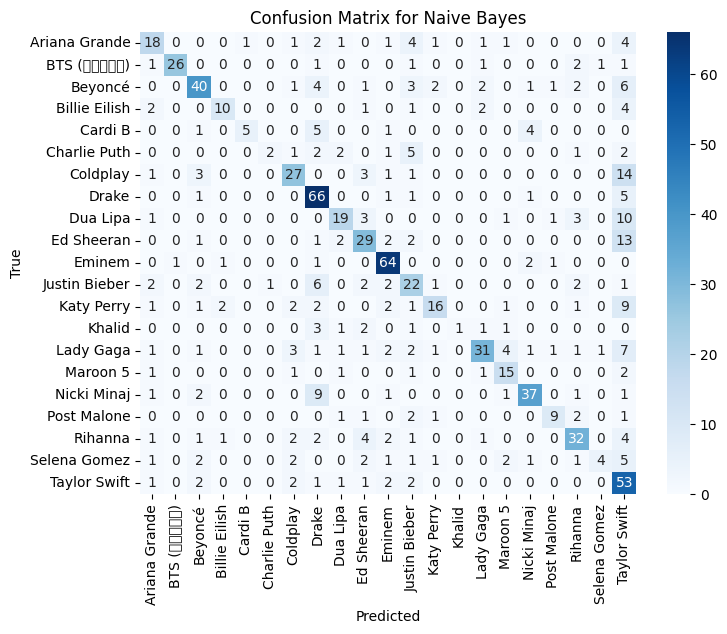

In [38]:
# Evaluate Naive Bayes Classifier on Test Set
nb_predictions_test = nb_classifier.predict(X_test_bow)
nb_accuracy_test = accuracy_score(y_test, nb_predictions_test)
nb_f1_test = f1_score(y_test, nb_predictions_test, average='weighted')

print(f"Naive Bayes - Test Accuracy: {nb_accuracy_test * 100:.2f}%")
print(f"Naive Bayes - Test F1 Score: {nb_f1_test:.2f}")

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Neural Network - Test Accuracy: 59.69%
Neural Network - Test F1 Score: 0.59


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

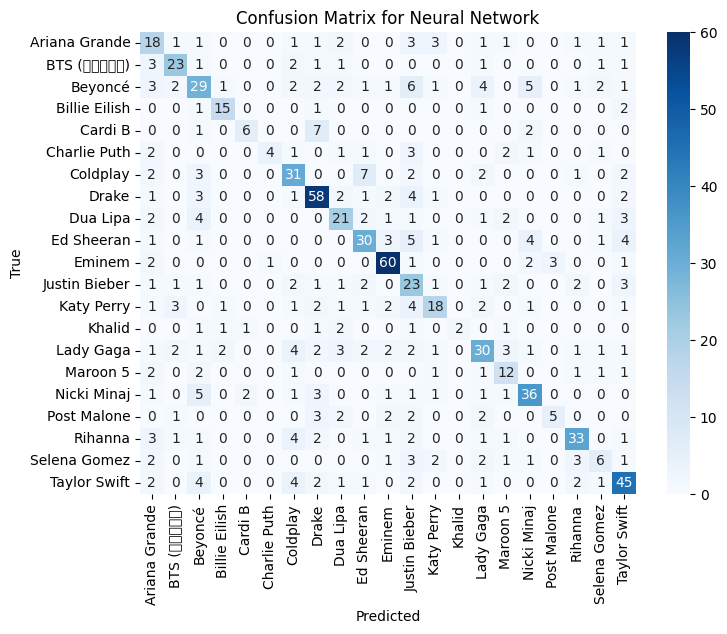

In [39]:
# Evaluate Neural Network Classifier on Test Set
nn_predictions_test = nn_classifier.predict(X_test_bow)
nn_accuracy_test = accuracy_score(y_test, nn_predictions_test)
nn_f1_test = f1_score(y_test, nn_predictions_test, average='weighted')

print(f"Neural Network - Test Accuracy: {nn_accuracy_test * 100:.2f}%")
print(f"Neural Network - Test F1 Score: {nn_f1_test:.2f}")

# Confusion Matrix for Neural Network
nn_cm = confusion_matrix(y_test, nn_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM - Test Accuracy: 58.75%
SVM - Test F1 Score: 0.58


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

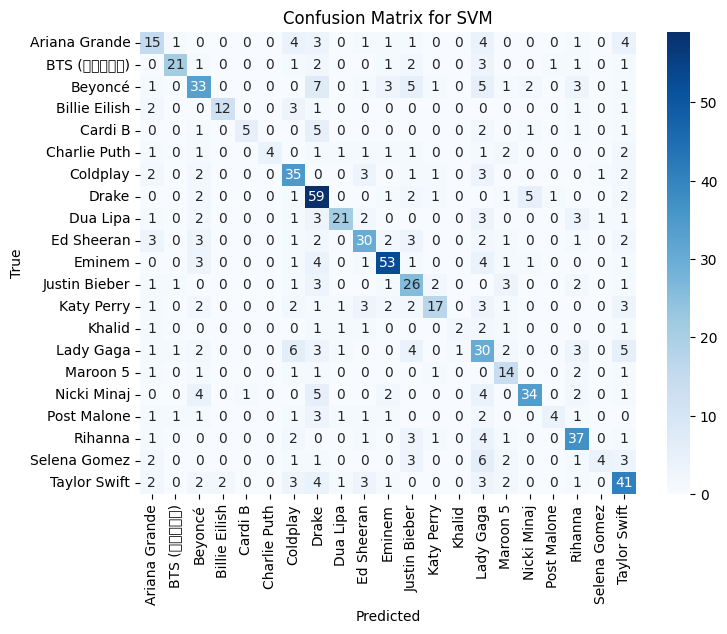

In [40]:
# Evaluate SVM Classifier on Test Set
svm_predictions_test = best_svm_model.predict(X_test_bow)
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)
svm_f1_test = f1_score(y_test, svm_predictions_test, average='weighted')

print(f"SVM - Test Accuracy: {svm_accuracy_test * 100:.2f}%")
print(f"SVM - Test F1 Score: {svm_f1_test:.2f}")

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Logistic Regression - Test Accuracy: 62.53%
Logistic Regression - Test F1 Score: 0.62


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

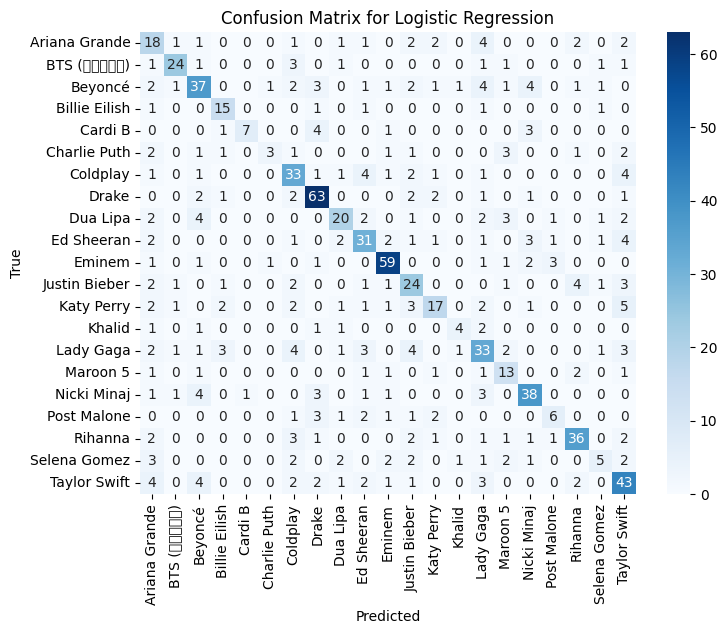

In [52]:
# Make predictions on the test set using Logistic Regression
lr_predictions_test = lr_classifier.predict(X_test_bow)

# Calculate accuracy for Logistic Regression on the test set
lr_accuracy_test = accuracy_score(y_test, lr_predictions_test)
lr_f1_test = f1_score(y_test, lr_predictions_test, average='weighted')

# Print the results
print(f"Logistic Regression - Test Accuracy: {lr_accuracy_test * 100:.2f}%")
print(f"Logistic Regression - Test F1 Score: {lr_f1_test:.2f}")

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [58]:
print(f"Naive Bayes Results")
print(f"Test Accuracy: {nb_accuracy_test * 100:.2f}%")
print(f"Test F1 Score: {nb_f1_test:.2f}")


print(f"\nNeural Network Results")
print(f"Test Accuracy: {nn_accuracy_test * 100:.2f}%")
print(f"Test F1 Score: {nn_f1_test:.2f}")


print(f"\nSupport Vector Machine(SVM) Results")
print(f"Test Accuracy: {svm_accuracy_test * 100:.2f}%")
print(f"Test F1 Score: {svm_f1_test:.2f}")


print(f"\nLogistic Regression Results")
print(f"Test Accuracy: {lr_accuracy_test * 100:.2f}%")
print(f"Test F1 Score: {lr_f1_test:.2f}")

Naive Bayes Results
Test Accuracy: 62.17%
Test F1 Score: 0.61

Neural Network Results
Test Accuracy: 59.69%
Test F1 Score: 0.59

Support Vector Machine(SVM) Results
Test Accuracy: 58.75%
Test F1 Score: 0.58

Logistic Regression Results
Test Accuracy: 62.53%
Test F1 Score: 0.62


# Assignment Report

**Data Cleaning & Exploring**

I started with a dataset containing 6027 song lyrics. After cleaning by removing unnecessary or placeholder lyrics, such as phrases like "lyrics for this song have yet to be released," the dataset was reduced to 5636 relevant lyrics. From the histogram of lyrics per artist, I noticed a class imbalance, with artists like Eminem, Drake, and Taylor Swift having more lyrics than others like Khalid and Cardi B. This imbalance requires techniques like resampling or specialized evaluation metrics to prevent the model from favoring more represented artists.


**Preprocessing Method**

Next, I created a preprocessing function for the lyrics, which involved converting the text to lowercase, and I removed punctuation, special characters, and common stopwords. I also tokenized and lemmatized the text using SpaCy. To enhance feature quality, I excluded the most frequent and rare words. After preprocessing, I applied TF-IDF vectorization to convert the lyrics into numerical features. Since class imbalance existed, I used SMOTE to balance the training set, but applied it only to the training data to prevent bias or data leakage. This increased the training set size from 3945 to 7707. The data was then split into training, development, and test sets, with resampling applied only to the training data.


**Selection of the Features and the Reasoning for the Selections**

For feature selection, I used the "Lyrics" and "Artist" columns. The goal was to classify artists based on their lyrics, so the "Lyrics" feature provides the content, and the "Artist" feature serves as the label. Other columns, like album or release date, were excluded as they didn’t add much value and could introduce noise. I used TF-IDF to transform the lyrics into numerical features, capturing important words for each artist’s songs. I included both unigrams and bigrams to capture individual words and common word pairs, while limiting the number of features to 5000 for efficiency. The "Artist" column was label-encoded for classification.


**Selection of the Classification Methods and the Reasoning for the Selection**

I selected a variety of machine learning models to compare performance. Logistic Regression was chosen for its simplicity and efficiency, often working well for text classification tasks with linearly separable data. Naive Bayes was essential because it’s well-suited for text classification, especially where word independence assumptions hold. Its ability to handle high-dimensional data efficiently makes it ideal for tasks like spam filtering. The Neural Network was chosen to explore complex, non-linear relationships in the data, as it can capture intricate patterns. Finally, I selected Support Vector Machine (SVM) for its strength in high-dimensional spaces, capable of handling both linear and non-linear decision boundaries. By testing these models, I aimed to understand their strengths and weaknesses for text classification and select the most suitable one.


**Confusion Matrices Interpretation**

The confusion matrices for all models show that Logistic Regression consistently outperforms the others, especially for Taylor Swift and Drake, with higher diagonal values indicating correct classifications. Naive Bayes and SVM also perform reasonably well, but with more misclassifications across different artists. Neural Networks tend to misclassify more frequently, especially with artists like Beyoncé and Coldplay. This suggests that while Logistic Regression is the most reliable, other models may benefit from further tuning to improve accuracy. Additionally, the misclassifications highlight areas where more advanced feature engineering or model adjustments could help.


**Limitations of My Approach**

One limitation of my approach was the poor performance of the Neural Network and SVM models compared to Logistic Regression and Naive Bayes. This may be because the models were too complex for the dataset or needed better tuning. Also, the reliance on Bag of Words (BoW) as a feature extraction method might have limited the models' ability to capture deeper semantic relationships between words. While the performance metrics are decent, there is still room for improvement in accuracy and F1 scores, especially in terms of model robustness and generalization.


**Possible Improvements to the System**

To improve the system, several steps can be taken. First, hyperparameter tuning for the Neural Network and SVM models could be refined to better optimize them for the dataset. Feature engineering could be improved by using word embeddings like Word2Vec, GloVe, or BERT to capture more semantic meaning from the text. Additionally, addressing class imbalance further (e.g., using other techniques or models) and improving data preprocessing (such as handling stopwords and lemmatization) could lead to better results. Lastly, experimenting with ensemble methods like Random Forests or Gradient Boosting could increase performance by combining the strengths of multiple models.\